# TASK 3: Cuisine Classification

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [3]:
##  there is no duplicate values and  null values
import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading the data set
df = pd.read_csv('Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
#display the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
#statistical summary
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Data Preprocessing

In [9]:
# Check for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
# if there is any missing value then fill
df.fillna(method='ffill', inplace=True)

In [18]:
#checking for duplicate values
dup=df.duplicated()
print(dup.sum())  

0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [22]:
#not use full column
df = df.drop(columns=['Restaurant Name','Address','Longitude','Latitude'])

In [24]:
df = df.dropna(subset=['Cuisines'])

In [26]:
#clean the labels
df['Cuisines'] = df['Cuisines'].astype(str).apply(lambda x: [c.strip() for c in x.split(',')])

In [28]:
#counting number of cuisine in it
df['num_Cuisines'] = df['Cuisines'].apply(len)
print(df)

      Restaurant ID  Country Code              City  \
0           6317637           162       Makati City   
1           6304287           162       Makati City   
2           6300002           162  Mandaluyong City   
3           6318506           162  Mandaluyong City   
4           6314302           162  Mandaluyong City   
...             ...           ...               ...   
9546        5915730           208         ��stanbul   
9547        5908749           208         ��stanbul   
9548        5915807           208         ��stanbul   
9549        5916112           208         ��stanbul   
9550        5927402           208         ��stanbul   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                        

In [30]:
df.head()

,Restaurant ID,Country Code,City,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,num_Cuisines
0,6317637,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","[French, Japanese, Desserts]",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,3
1,6304287,162,Makati City,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",[Japanese],1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","[Seafood, Asian, Filipino, Indian]",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,4
3,6318506,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","[Japanese, Sushi]",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,2
4,6314302,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","[Japanese, Korean]",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,2


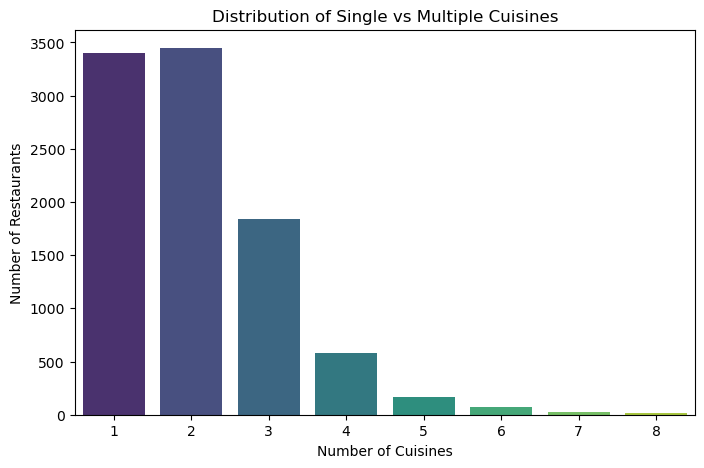

In [32]:
# plot distribution of single vs multiple cuisines
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(x=df['num_Cuisines'], palette='viridis')
plt.xlabel("Number of Cuisines")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Single vs Multiple Cuisines")
plt.show()


#### MultiLabelBinarizer




In [35]:
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

In [37]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Cuisines'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Cuisines              9551 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   object 
 8   Has Table booking     9551 non-null   object 
 9   Has Online delivery   9551 non-null   object 
 10  Is delivering now     9551 non-null   object 
 11  Switch to order menu  9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Aggregate rating      9551 non-null   float64
 14  Rating color          9551 non-null   object 
 15  Rating text          

### Label Encoding

In [42]:
data = pd.DataFrame(df)

In [44]:
encoder = LabelEncoder()
data['Country Code'] = encoder.fit_transform(df['Country Code'].astype(str))
data['Price range'] = encoder.fit_transform(df['Price range'].astype(str))
data['Aggregate rating'] = encoder.fit_transform(df['Aggregate rating'].astype(str))
data['Votes'] = encoder.fit_transform(df['Votes'].astype(str))
data['City'] = df['City'].astype(str)
data['City_Code'] = encoder.fit_transform(df['City'])

In [46]:
feature = ['Country Code', 'Price range', 'Aggregate rating', 'Votes', 'City_Code']
x= data[feature]

## Split the data into train and test

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [51]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(9551, 5)
(7640, 5)
(1911, 5)


In [53]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(9551, 145)
(7640, 145)
(1911, 145)


## Model Training

### Logistic Regression

In [57]:
new_labels = y_train.sum(axis=0) > 0  # Keep labels with at least one positive sample
y_train = y_train[:, new_labels]
y_test = y_test[:, new_labels]
mlb.classes_ = mlb.classes_[new_labels]

In [59]:
from sklearn.multioutput import MultiOutputClassifier
model =  MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                   random_state=42))

In [60]:
y_pred = model.predict(x_test)

In [61]:
ac = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro') 
recall = recall_score(y_test, y_pred, average='macro')

print(f"accuracy_score: {ac}")
print(f'precision_score:', {pre})
print(f"recall:', {recall}")

accuracy_score: 0.017791732077446363
precision_score: {0.01752884496411779}
recall:', 0.00625643838413613


### Random Forest

In [63]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred = model_rf.predict(x_test)

In [72]:
ac = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro') 
recall = recall_score(y_test, y_pred, average='macro')

print(f"accuracy_score: {ac}")
print(f'precision_score:', {pre})
print(f"recall:", {recall})

accuracy_score: 0.04500261643118786
precision_score: {0.06339988277916803}
recall: {0.044359211217691076}


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


                   precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         5
          African       0.00      0.00      0.00         2
         American       0.18      0.07      0.11        80
           Andhra       0.00      0.00      0.00         3
          Arabian       0.00      0.00      0.00         8
        Argentine       0.00      0.00      0.00         0
         Armenian       0.00      0.00      0.00         1
            Asian       0.00      0.00      0.00        36
     Asian Fusion       0.00      0.00      0.00         0
         Assamese       0.00      0.00      0.00         3
       Australian       0.00      0.00      0.00         0
           Awadhi       0.00      0.00      0.00         2
              BBQ       0.00      0.00      0.00        10
           Bakery       0.16      0.05      0.07       142
         Bar Food       0.00      0.00      0.00        10
          Belgian       0.00      0.00      0.00       

In [76]:
rf_model = MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))


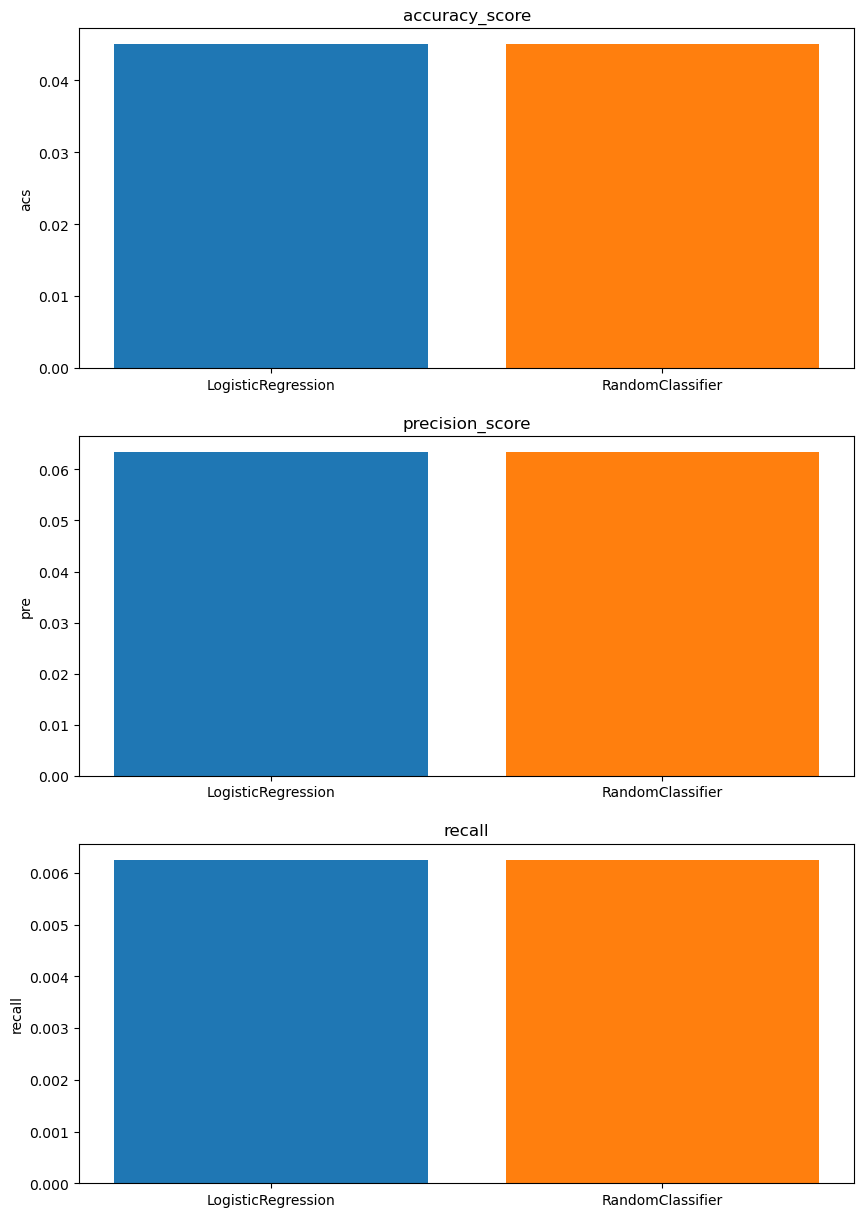

In [79]:
# Metrics for each model
accuracy_score=[0.017791732077446363,0.04500261643118786]
precision_score = [0.01752884496411779,0.06339988277916803]
recall = [0.00625643838413613,0.00625643838413613]
   
labels = ['LogisticRegression','RandomClassifier']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Different colors for each model

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  

# Plot MSE
plt.subplot(3, 1, 1)
plt.bar(labels, ac, color=colors)
plt.title("accuracy_score")
plt.ylabel("acs")

# Plot MAE
plt.subplot(3, 1, 2)
plt.bar(labels, pre, color=colors)
plt.title("precision_score")
plt.ylabel("pre")

# Plot R-squared
plt.subplot(3, 1, 3)
plt.bar(labels, recall, color=colors)
plt.title("recall")
plt.ylabel("recall")
plt.show()